In [1]:
import numpy as np
import pandas as pd

# Preparación de Subconjuntos de Datos

## Carga de Datos ##

In [2]:
import os

COVID_URL = os.path.join('..', 'datasets', '211006COVID19MEXICO.csv')
print(COVID_URL)

..\datasets\211006COVID19MEXICO.csv


In [3]:
# Definir el tipo de dato hace el proceso más eficiente
types = {
    'FECHA_ACTUALIZACION': 'object',
    'ID_REGISTRO': 'object',
    'ORIGEN': np.int8,
    'SECTOR': np.int8,
    'ENTIDAD_UM': np.int8,
    'SEXO': np.int8,
    'ENTIDAD_NAC': np.int8,
    'ENTIDAD_RES': np.int8,
    'MUNICIPIO_RES': np.int8,
    'TIPO_PACIENTE': np.int8,
    'FECHA_INGRESO': 'object',
    'FECHA_SINTOMAS': 'object',
    'FECHA_DEF': 'object',
    'INTUBADO': np.int8,
    'NEUMONIA': np.int8,
    'EDAD': np.int8,
    'NACIONALIDAD': np.int8,
    'EMBARAZO': np.int8,
    'HABLA_LENGUA_INDIG': np.int8,
    'INDIGENA': np.int8,
    'DIABETES': np.int8,
    'EPOC': np.int8,
    'ASMA': np.int8,
    'INMUSUPR': np.int8,
    'HIPERTENSION':np.int8,
    'OTRAS_COM': np.int8,
    'CARDIOVASCULAR': np.int8,
    'OBESIDAD': np.int8,
    'RENAL_CRONICA': np.int8,
    'TABAQUISMO': np.int8,
    'OTRO_CASO': np.int8,
    'TOMA_MUESTRA_LAB': np.int8,
    'RESULTADO_LAB': np.int8,
    'TOMA_MUESTRA_ANTIGENO': np.int8,
    'RESULTADO_ANTIGENO': np.int8,
    'CLASIFICACION_FINAL': np.int8,
    'MIGRANTE': np.int8,
    'PAIS_NACIONALIDAD': 'object',
    'PAIS_ORIGEN': 'object',
    'UCI': np.int8
}

In [4]:
# 'latin' porque contiene acentos
df = pd.read_csv(COVID_URL, encoding='latin', dtype=types)

In [5]:
df.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-10-06,z482b8,2,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
1,2021-10-06,z49a69,1,12,23,1,23,23,4,2,...,1,2,97,2,97,2,99,MÃ©xico,97,1
2,2021-10-06,z23d9d,1,12,22,2,24,22,9,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
3,2021-10-06,z24953,1,12,9,1,9,9,10,1,...,1,1,2,2,97,7,99,MÃ©xico,97,97
4,2021-10-06,zz8e77,2,12,9,2,9,9,2,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97


In [6]:
# Los tipos que definimos se respetan. Los otros se intuyen (no de manera óptima)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10807151 entries, 0 to 10807150
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int8  
 3   SECTOR                 int8  
 4   ENTIDAD_UM             int8  
 5   SEXO                   int8  
 6   ENTIDAD_NAC            int8  
 7   ENTIDAD_RES            int8  
 8   MUNICIPIO_RES          int8  
 9   TIPO_PACIENTE          int8  
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int8  
 14  NEUMONIA               int8  
 15  EDAD                   int8  
 16  NACIONALIDAD           int8  
 17  EMBARAZO               int8  
 18  HABLA_LENGUA_INDIG     int8  
 19  INDIGENA               int8  
 20  DIABETES               int8  
 21  EPOC                   int8  
 22  ASMA                   int8  
 23  INMUS

## Estrategia para el análisis ##

* Eliminar campos que no nos sirven ahora: ID Registro, Municipio de procedencia, Origen, Entidad_UM, Fecha de Síntomas, País de Origen, País de Nacionalidad, Migrante, Otro Caso, Tipo de Paciente, Habla lengua indígena, Fecha de actualización.
* Indagar y trabajar más sobre campos útiles: Fecha de actualización, Fecha de defunción, Fecha de ingreso.
* Identificar preguntas que queremos responder
    * ¿Cuántos hombres y mujeres se infectaron o fallecieron?
    * ¿Qué estados han sufrido más por el COVID?
    * ¿Cómo ha ido avanzando la pandemia en México?
    * ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia?
    * ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
    * ¿Cuál es el efecto de las complicaciones presentadas en lso infectados?
    * ¿Cómo se distribuyen los infectados y fallecidos según en el espectro de edades?
    * ¿Existe alguna correlación entre el tiempo en morir y las edades?

## Selección de Datos
Seleccionar implica, como su nombre dice, elegir aquelas columnas o filas que servirán en posteriores análisis. En nuestro caso, eliminaremos ciertos campos y registros innecesarios.

### Eliminar registros innecesarios para el análisis

In [7]:
# Eliminamos registros no relacionados al COVID (casos negativos o sospechosos)
rows = df[df.CLASIFICACION_FINAL>3].index
rows

Int64Index([       2,        3,        4,        5,        6,        7,
                   9,       10,       11,       12,
            ...
            10807141, 10807142, 10807143, 10807144, 10807145, 10807146,
            10807147, 10807148, 10807149, 10807150],
           dtype='int64', length=7107530)

In [8]:
df.drop(rows, inplace=True)

### Eliminar columnas innecesarias para el análisis

In [10]:
# Eliminamos columnas innecesarias
cols = ['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'NACIONALIDAD', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'OTRA_COM', 'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
        'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN']
df.drop(cols, axis=1, inplace=True)

In [11]:
# La memoria se ha reducido drásticamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699621 entries, 0 to 10807130
Data columns (total 22 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SECTOR               int8  
 1   ENTIDAD_UM           int8  
 2   SEXO                 int8  
 3   TIPO_PACIENTE        int8  
 4   FECHA_INGRESO        object
 5   FECHA_SINTOMAS       object
 6   FECHA_DEF            object
 7   INTUBADO             int8  
 8   NEUMONIA             int8  
 9   EDAD                 int8  
 10  EMBARAZO             int8  
 11  DIABETES             int8  
 12  EPOC                 int8  
 13  ASMA                 int8  
 14  INMUSUPR             int8  
 15  HIPERTENSION         int8  
 16  CARDIOVASCULAR       int8  
 17  OBESIDAD             int8  
 18  RENAL_CRONICA        int8  
 19  TABAQUISMO           int8  
 20  CLASIFICACION_FINAL  int8  
 21  UCI                  int8  
dtypes: int8(19), object(3)
memory usage: 179.9+ MB


In [12]:
df.head(5)

,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,UCI
0,12,9,2,1,2020-10-16,2020-10-16,9999-99-99,97,2,41,...,2,2,2,2,2,2,2,2,1,97
1,12,23,1,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,...,2,2,2,1,2,1,2,2,2,1
8,12,12,2,1,2020-08-19,2020-08-17,9999-99-99,97,2,47,...,2,2,2,2,2,2,2,2,3,97
14,6,22,2,1,2020-08-31,2020-08-26,9999-99-99,97,2,54,...,2,2,2,2,2,2,2,2,3,97
15,12,9,1,1,2020-09-08,2020-09-03,9999-99-99,97,2,26,...,2,2,2,2,2,2,2,2,3,97


## Limpieza de datos
Limpiar involucra el proceso de convertir los datos a un formato legible y estandarizado para su procesamiento

Existen varias a considerar al filtrar los datos. Estos son mayormente conversiones de categorías.
- El campo SEXO se compone de 3 valores (1 para mujeres, 2 para hombres y 99 en caso de no ser especificado). Los campos con valor 99 se desecharán y convertiremos la variable sexo en una variable binaria (0 para hombres, 1 para mujeres).
- Los campos que representna a las afecciones previas y las complicaciones del paciente (EMBARAZO, INTUBADO, etc.) presentan un catálogo de datos de 5 valores (1 es SI, 2 es NO, 97 es NO APLICA, 98 es SE IGNORA y  99 es NO ESPECIFICADO). Queremos convertir estos campos a tipo binario, para que sólo existan valores 0 para NO y 1 para SI.
- El campo TIPO PACIENTE presenta 3 valores (1 es Ambulatorio, 2 es Hospitalizado y 99 es No ESPECIFICADO). Queremos convertirlo a una variable binario, con Ambulatorio como 0 y Hospitalizado como 1. Los valores NO ESPECIFICADO pueden eliminarse en caso necesario.

### Limpieza de Sexo

In [20]:
# Desechamos registros con valor 99
rows = df[df.SEXO==99].index
df.drop(rows, inplace=True)

In [32]:
# Función de conversión
clean_sex = lambda x: 1 if x==1 else 0

In [33]:
# Aplicamos la conversión y guardamos los datos en la misma columna
df['SEXO'] = df['SEXO'].apply(clean_sex).astype('int8') # astype permite conservar el tipo de dato original

### Limpieza de Afecciones y Complicaciones

In [58]:
cols = ['INTUBADO', 'NEUMONIA', 'EMBARAZO', 'DIABETES', 'EPOC',
       'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'UCI']

Antes de filtrar valores, queremos verificar cuantos registros se borarrían.

In [70]:
df.shape[0]

3699621

In [77]:
def count_per_case(case):
    # case puede ser: 1 (SI), 2(NO), 97(NO APLICA), 98(SE IGNORA), 99(NO ESPEC.)
    count = 0
    for col in cols:
        value_counts = (df[col]==case).value_counts()
        try:
            print(col, value_counts[True])
            count += value_counts[True]
        except:
            print(col, 0)
    print('TOTAL:', count, ' --- ', count/df.shape[0]*100, '% del dataset')

In [78]:
# Casos de NO APLICA
count_per_case(97)

INTUBADO 3119753
NEUMONIA 0
EMBARAZO 1846448
DIABETES 0
EPOC 0
ASMA 0
INMUSUPR 0
HIPERTENSION 0
CARDIOVASCULAR 0
OBESIDAD 0
RENAL_CRONICA 0
TABAQUISMO 0
UCI 3119753
TOTAL: 8085954  ---  218.56168510233886 % del dataset


En este caso, es obvio que casos de NO APLICA en la columna EMBARAZO son en gran mayoría en los pacientes hombres. Esto se puede solucionar simplemente ajustando el valor a 2 (NO).   
Para los INTUBADOS y UCI, el que tengan los valores tan exactos significa que aplican a un segmento específico de la población, que se presume son los pacientes no fallecidos. También puede ajustarse el valor a NO.   
De esta forma no es necesario eliminar los registros con valores 97 (que ya de por sí serían todos).

In [83]:
# Función de conversión
def func_no_aplica(x):
    if x==1: return 1 # Caso SI
    if x==2: return 0 # Caso NO
    if x==97: return 0 # Caso NO APLICA
    else: return x # Otros casos (98, 99)

In [84]:
cols_no_aplica = ['INTUBADO', 'EMBARAZO', 'UCI']
for col in cols_no_aplica:
    df[col] = df[col].apply(func_no_aplica).astype('int8')

In [85]:
# Casos de SE IGNORA
count_per_case(98)

INTUBADO 0
NEUMONIA 0
EMBARAZO 11301
DIABETES 8600
EPOC 7993
ASMA 7832
INMUSUPR 8049
HIPERTENSION 8030
CARDIOVASCULAR 8011
OBESIDAD 7576
RENAL_CRONICA 7946
TABAQUISMO 8344
UCI 0
TOTAL: 83682  ---  2.2619073683493527 % del dataset


In [86]:
# Casos de NO ESPEC.
count_per_case(99)

INTUBADO 5058
NEUMONIA 2977
EMBARAZO 2
DIABETES 0
EPOC 0
ASMA 0
INMUSUPR 0
HIPERTENSION 0
CARDIOVASCULAR 0
OBESIDAD 0
RENAL_CRONICA 0
TABAQUISMO 0
UCI 5069
TOTAL: 13106  ---  0.35425250316181034 % del dataset


In [109]:
df_copy = df.copy()

Tanto en los casos de SE IGNORA como NO ESPEC, el porcentaje de registros con tales valores asciende a menos del 5 % del dataset, por lo que se decide eliminarlos del mismo.

In [110]:
values_to_delete = [98,99]
for col in cols:
    for value in values_to_delete:
        rows_to_delete = (df[df[col]==value]).index
        df.drop(rows_to_delete, inplace=True)

### Limpieza de TIPO _PACIENTE

In [113]:
rows = df[df['TIPO_PACIENTE']==99].index
df.drop(rows, axis=0, inplace=True)

Una vez terminado la limpieza, podemos guardar los datos

In [115]:
# Porcentaje de datos originales con los que quedamos
df.shape[0]/3700000 * 100

99.12783783783784

### Salvar un checkpoint de los datos

In [116]:
clean_dataset_path = os.path.join('..', 'datasets', 'clean_covid_dataset.csv')
df.to_csv(clean_dataset_path)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667730 entries, 0 to 10785803
Data columns (total 22 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SECTOR               int8  
 1   ENTIDAD_UM           int8  
 2   SEXO                 int8  
 3   TIPO_PACIENTE        int8  
 4   FECHA_INGRESO        object
 5   FECHA_SINTOMAS       object
 6   FECHA_DEF            object
 7   INTUBADO             int8  
 8   NEUMONIA             int8  
 9   EDAD                 int8  
 10  EMBARAZO             int8  
 11  DIABETES             int8  
 12  EPOC                 int8  
 13  ASMA                 int8  
 14  INMUSUPR             int8  
 15  HIPERTENSION         int8  
 16  CARDIOVASCULAR       int8  
 17  OBESIDAD             int8  
 18  RENAL_CRONICA        int8  
 19  TABAQUISMO           int8  
 20  CLASIFICACION_FINAL  int8  
 21  UCI                  int8  
dtypes: int8(19), object(3)
memory usage: 307.4+ MB


# Generación del Primer Subset de Datos

## Transformación de datos
De vez en cuando debemos modificar los datos que ya tenemos o agregar nuevos dependiendo de la información del dataset.
* datetime() convierte datos de cualquier tipo al ofrmato Datatime, que permite condensar información sobre fechas, como años, meses, días, etc.
* apply() es una función que se aplica a cada columna o fila de un DataFrame, con el fin de calcular valores que serán retornado al final en forma de un Series. Normalmente es usado para hacer agregación de datos, pero igual puede ser utilizado para crear nuevos campos.

In [11]:
# Convertimos la fecha de tipo String a tipo Datetime
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'], format='%Y-%m-%d')

In [12]:
# Ahora podemos saber el año, mes y día de forma más sencilla
df.iloc[5].FECHA_SINTOMAS.day # month, year

28

In [13]:
# FECHA_DEF no puede ser convertido directamente, debido a que posee fechas incorrectas ('9999-99-99')
# Establecemos 2000-01-01 como fecha de def. para los no fallecidos
fecha_modif = df.apply(lambda fila: '2000-01-01' if fila.FECHA_DEF=='9999-99-99' else fila.FECHA_DEF, axis='columns')
fecha_modif

0          2000-01-01
1          2000-01-01
2          2000-01-01
3          2000-01-01
4          2020-03-30
              ...    
2023452    2000-01-01
2023453    2000-01-01
2023454    2000-01-01
2023455    2000-01-01
2023456    2000-01-01
Length: 796399, dtype: object

In [14]:
# El resultado lo asignamos al campo...
df['FECHA_DEF'] = fecha_modif

In [15]:
# ...y luego lo convertimos.
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'], format='%Y-%m-%d')

In [16]:
# Sobre la fecha de ingreso, sólo necesitamos el mes
df['FECHA_INGRESO'] = df.apply(lambda x: int(x.FECHA_INGRESO.split('-')[1]), axis='columns')

In [17]:
# Cambiamos el nombre de FECHA_INGRESO A MES_INGRESO
df.rename(columns={'FECHA_INGRESO': 'MES_INGRESO'}, inplace=True)

In [18]:
# Finalmente, agregamos un campo para filtrar con mayor comodidad
df['RESULTADO'] = df.apply(lambda x: 1 if x.FECHA_DEF.year==2000 else 0, axis='columns')

In [19]:
# Podemos ver que los tipos de dato han cambiado
# Podríamos mejorar el uso de memoria de datetime en un futuro
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796399 entries, 0 to 2023456
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SECTOR          796399 non-null  int8          
 1   SEXO            796399 non-null  int8          
 2   ENTIDAD_RES     796399 non-null  int8          
 3   MES_INGRESO     796399 non-null  int64         
 4   FECHA_SINTOMAS  796399 non-null  datetime64[ns]
 5   FECHA_DEF       796399 non-null  datetime64[ns]
 6   INTUBADO        796399 non-null  int8          
 7   NEUMONIA        796399 non-null  int8          
 8   EDAD            796399 non-null  int8          
 9   EMBARAZO        796399 non-null  int8          
 10  DIABETES        796399 non-null  int8          
 11  EPOC            796399 non-null  int8          
 12  ASMA            796399 non-null  int8          
 13  INMUSUPR        796399 non-null  int8          
 14  HIPERTENSION    796399 non-null  in

### Salvemos los datos ###
Todos los datos necesitan ser guardados en un archivo, normalmente un formato sencillo llamado CSV.

In [20]:
CLEAN_COVID_URL = os.path.join('..', 'datasets', 'Clean_Covid_Dataset.csv')
df.to_csv(CLEAN_COVID_URL)

In [21]:
!dir ..\datasets

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: E854-2EA9

 Directorio de C:\Users\Sebasti n\Desktop\MLDiv\data-analysis-workshop-mldiv\datasets

19/10/2020  11:18 p. m.    <DIR>          .
19/10/2020  11:18 p. m.    <DIR>          ..
12/10/2020  01:23 p. m.       328,967,538 201012COVID19MEXICO.csv
07/10/2020  05:23 p. m.            87,935 Catalogos_071020.xlsx
19/10/2020  11:58 p. m.        61,089,883 Clean_Covid_Dataset.csv
13/10/2020  01:43 a. m.    <DIR>          clean_data
07/10/2020  05:23 p. m.            15,552 Descriptores_071020.xlsx
               4 archivos    390,160,908 bytes
               3 dirs  145,152,606,208 bytes libres


In [22]:
# Creamos una función que guarde cualquier archivo
CLEAN_DATA_FOLDER = os.path.join('..', 'datasets', 'clean_data')

if not os.path.exists(CLEAN_DATA_FOLDER): os.mkdir(CLEAN_DATA_FOLDER)

def save_csv(df, name):
    file_url = os.path.join(CLEAN_DATA_FOLDER, f'{name}.csv')
    df.to_csv(file_url)

### Agrupaciones y Agregaciones ###
A veces, se necesita hacer una análisis no a todo el dataset, pero a grupos específicos del mismo. Normalmente lo que se desea es "agregar la información" o, en otras palabras, conseguir ciertos valores que describan esas poblaciones de datos.   
Agregaciones comunes son el promedio, la mediana, el rango, etc.

En esta sección responderemos las preguntas
* ¿Cuántos hombres y mujeres se infectaron o fallecieron?
* ¿Qué estados han sufrido más por el COVID?
* ¿Cómo ha ido avanzando la pandemia en México?
* ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia?
* ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
* ¿Qué tipo de complicaciones presentaron los hospitalizados?

#### ¿Cuántos hombres y mujeres se infectaron o fallecieron? ####

In [23]:
# Agrupemos por sexo y luego por resultado
covid_por_genero = df[['RESULTADO']].groupby([df['SEXO'], df['RESULTADO']]).count()
covid_por_genero

RESULTADO
SEXO RESULTADO           
1    0              29273
     1             355383
2    0              52147
     1             359596

In [24]:
# Reordenamos los datos
# unstack() crea una copia de los datos
covid_por_genero = covid_por_genero.unstack()
covid_por_genero.columns = pd.Index(['FALLECIDOS', 'INFECTADOS'])
covid_por_genero.index = pd.Index(['HOMBRES', 'MUJERES'], name='GENERO')
covid_por_genero

,FALLECIDOS,INFECTADOS
GENERO,,
HOMBRES,29273,355383
MUJERES,52147,359596


In [25]:
# Diseñamos una func. para simplificar el proceso anterior
def format_dataframe(data, index_arr, index_name):
    df = data.unstack()
    df.columns = pd.Index(['FALLECIDOS', 'INFECTADOS'])
    df.index = pd.Index(index_arr, name=index_name)
    return df

In [26]:
# Guardamos los datos
save_csv(covid_por_genero, 'covid_por_genero')

#### ¿Qué estados han sufrido más por el COVID? ####

In [27]:
# Agrupamos por estado y luego por resultado
covid_por_estado = df[['RESULTADO']].groupby([df['ENTIDAD_RES'], df['RESULTADO']]).count()
covid_por_estado

RESULTADO
ENTIDAD_RES RESULTADO           
1           0                682
            1               7274
2           0               3689
            1              16708
3           0                550
...                          ...
30          1              30277
31          0               1646
            1              17715
32          0                790
            1               7641

[64 rows x 1 columns]

In [28]:
estados = [
    'AGUASCALIENTES',
    'BAJA CALIFORNIA',
    'BAJA CALIFORNIA SUR',
    'CAMPECHE',
    'COAHUILA',
    'COLIMA',
    'CHIAPAS',
    'CHIHUAHUA',
    'CDMX',
    'DURANGO',
    'GUANAJUATO',
    'GUERRERO',
    'HIDALGO',
    'JALISCO',
    'EDOMEX',
    'MICHOACAN',
    'MORELOS',
    'NAYARIT',
    'NUEVO LEON',
    'OAXACA',
    'PUEBLA',
    'QUERETARO',
    'Q. ROO',
    'SLP',
    'SINALOA',
    'SONORA',
    'TABASCO',
    'TAMAULIPAS',
    'TLAXCALA',
    'VERACRUZ',
    'YUCATAN',
    'ZACATECAS'
]

In [29]:
covid_por_estado = format_dataframe(covid_por_estado, estados, 'ESTADOS')
covid_por_estado

,FALLECIDOS,INFECTADOS
ESTADOS,,
AGUASCALIENTES,682,7274
BAJA CALIFORNIA,3689,16708
BAJA CALIFORNIA SUR,550,10597
CAMPECHE,833,5267
COAHUILA,2008,26678
COLIMA,585,4968
CHIAPAS,1101,5537
CHIHUAHUA,1479,11260
CDMX,10072,127304


In [30]:
save_csv(covid_por_estado, 'covid_por_estado')

#### ¿Cómo ha ido avanzando la pandemia en México? ####

In [31]:
# ¿Cómo ha ido avanzando la pandemia en México?
covid_por_mes = df[['RESULTADO']].groupby([df['MES_INGRESO'], df['RESULTADO']]).count()
covid_por_mes

RESULTADO
MES_INGRESO RESULTADO           
1           1                  2
2           0                  1
            1                  8
3           0                355
            1               2185
4           0               5643
            1              21003
5           0              14379
            1              72565
6           0              18759
            1             134691
7           0              19773
            1             180861
8           0              13808
            1             144933
9           0               8063
            1             128091
10          0                639
            1              30640

In [32]:
meses = [
    'ENERO',
    'FEBRERO',
    'MARZO',
    'ABRIL',
    'MAYO',
    'JUNIO',
    'JULIO',
    'AGOSTO',
    'SEPTIEMBRE',
    'OCTUBRE'
]

In [33]:
covid_por_mes = format_dataframe(covid_por_mes, meses, 'MESES')
covid_por_mes

,FALLECIDOS,INFECTADOS
MESES,,
ENERO,NaN,2.0
FEBRERO,1.0,8.0
MARZO,355.0,2185.0
ABRIL,5643.0,21003.0
MAYO,14379.0,72565.0
JUNIO,18759.0,134691.0
JULIO,19773.0,180861.0
AGOSTO,13808.0,144933.0
SEPTIEMBRE,8063.0,128091.0


In [34]:
# Rellenamos datos vacíos antes de guardar
covid_por_mes = covid_por_mes.fillna(0)
covid_por_mes = covid_por_mes.astype(np.int32)

In [35]:
covid_por_mes

,FALLECIDOS,INFECTADOS
MESES,,
ENERO,0,2
FEBRERO,1,8
MARZO,355,2185
ABRIL,5643,21003
MAYO,14379,72565
JUNIO,18759,134691
JULIO,19773,180861
AGOSTO,13808,144933
SEPTIEMBRE,8063,128091


In [36]:
save_csv(covid_por_mes, 'covid_por_mes')

#### ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia? ####

In [37]:
covid_por_sistema = df[['RESULTADO']].groupby([df['SECTOR'], df['RESULTADO']]).count()
covid_por_sistema

RESULTADO
SECTOR RESULTADO           
1      0                  3
       1                 62
2      1                510
3      0               1673
       1              12764
4      0              45523
       1             206592
5      0                753
       1               5232
6      0               5451
       1              28464
7      0                 30
       1                680
8      0               1244
       1               6639
9      0               1082
       1              23097
10     0                805
       1               4479
11     0                361
       1               4776
12     0              24424
       1             421218
13     0                 71
       1                466

In [38]:
sistemas = [
    'CRUZ_ROJA',
    'DIF',
    'ESTATAL',
    'IMSS',
    'IMSS-BIENESTAR',
    'ISSSTE',
    'MUNICIPAL',
    'PEMEX',
    'PRIVADA',
    'SEDENA',
    'SEMAR',
    'SSA',
    'UNIVERSITARIO',
]

In [39]:
covid_por_sistema = format_dataframe(covid_por_sistema, sistemas, 'SISTEMA')
covid_por_sistema

,FALLECIDOS,INFECTADOS
SISTEMA,,
CRUZ_ROJA,3.0,62.0
DIF,NaN,510.0
ESTATAL,1673.0,12764.0
IMSS,45523.0,206592.0
IMSS-BIENESTAR,753.0,5232.0
ISSSTE,5451.0,28464.0
MUNICIPAL,30.0,680.0
PEMEX,1244.0,6639.0
PRIVADA,1082.0,23097.0


In [40]:
# Antes de guardar, necesitamos rellenar el dato vacío y optimizar el DF
covid_por_sistema = covid_por_sistema.fillna(0)
covid_por_sistema = covid_por_sistema.astype(np.int32)

In [41]:
covid_por_sistema

,FALLECIDOS,INFECTADOS
SISTEMA,,
CRUZ_ROJA,3,62
DIF,0,510
ESTATAL,1673,12764
IMSS,45523,206592
IMSS-BIENESTAR,753,5232
ISSSTE,5451,28464
MUNICIPAL,30,680
PEMEX,1244,6639
PRIVADA,1082,23097


In [42]:
save_csv(covid_por_sistema, 'covid_por_sistema')

### Concatenando DataFrames ###
Otra función común al hacer análissi de datos, es juntar dos o más DataFrames. Aunque se pueden hacer combinaciones interesantes con merge() y join(), en este caso sólo necesitamos "pegar" dos DataFrames, no mezclarlos.

Aquí respondemos las preguntas:
* ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
* ¿Cuál es el efecto de las complicaciones presentadas en lso infectados?

#### ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID? ¿Cuántos muertos han producido estas enfermedades preexistentes? ####

In [43]:
# Primero seleccionamos los registros de personas con HIPERTENSIÓN
# Luego agrupamos por personas fallecidas y no fallecidas
# Calculamos el número de registros en cada grupo
# Y seleccionamos el campo de HIPERTENSIÓN para un mejor presentación
covid_por_hiper = df[df['HIPERTENSION']==1].groupby([df['RESULTADO']]).count()[['HIPERTENSION']]
covid_por_hiper

,HIPERTENSION
RESULTADO,
0,36669
1,115890


In [44]:
# Para poder concatenarlo, tomamos la transpuesta
covid_por_hiper = covid_por_hiper.T
covid_por_hiper

RESULTADO,0,1
HIPERTENSION,36669,115890


In [45]:
# Hacemos lo mismo para personas con enfermedades CARDIOVASCULARes
covid_por_cardio = df[df['CARDIOVASCULAR']==1].groupby(df['RESULTADO']).count()[['CARDIOVASCULAR']]
covid_por_cardio

,CARDIOVASCULAR
RESULTADO,
0,4344
1,11077


In [46]:
covid_por_cardio = covid_por_cardio.T
covid_por_cardio

RESULTADO,0,1
CARDIOVASCULAR,4344,11077


In [47]:
# Concatenamos para tener una mejor presentación
covid_por_hiper.append(covid_por_cardio)

RESULTADO,0,1
HIPERTENSION,36669,115890
CARDIOVASCULAR,4344,11077


Todo este proceso de agrupación y agregación es tedioso. Diseñaremos una función que haga este proceso y que además concatene los DataFrames por nosotros.

In [48]:
enfermedades = ['EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
                'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD',
                'RENAL_CRONICA', 'TABAQUISMO', 'OTRA_COM']

In [49]:
# Diseñamos una función que lo haga por nosotros
def results_by_affection(data, affections):
    res = None
    isFirst = True
    for affec in affections:
        a = df[df[affec]==1][[affec]].groupby([df['RESULTADO']]).count()
        a = a.T
        if (isFirst):
            res = a
            isFirst = False
        else:
            res = res.append(a)
    return res

In [50]:
covid_por_enf = results_by_affection(df, enfermedades)
covid_por_enf

RESULTADO,0,1
EMBARAZO,85,5808
DIABETES,31241,90035
EPOC,3967,7389
ASMA,1631,18903
INMUSUPR,2012,6454
HIPERTENSION,36669,115890
CARDIOVASCULAR,4344,11077
OBESIDAD,19920,121880
RENAL_CRONICA,5790,9059
TABAQUISMO,6542,51727


In [51]:
# Hacemos un pequeño cambio
covid_por_enf.columns = pd.Index(['FALLECIDOS', 'INFECTADOS'])
covid_por_enf.index.rename('ENFERMEDAD', inplace=True)
covid_por_enf

,FALLECIDOS,INFECTADOS
ENFERMEDAD,,
EMBARAZO,85,5808
DIABETES,31241,90035
EPOC,3967,7389
ASMA,1631,18903
INMUSUPR,2012,6454
HIPERTENSION,36669,115890
CARDIOVASCULAR,4344,11077
OBESIDAD,19920,121880
RENAL_CRONICA,5790,9059


In [52]:
save_csv(covid_por_enf, 'covid_por_enf')

#### ¿Cuál es el efecto de las complicaciones presentadas en los infectados? ####

In [53]:
complicaciones = ['INTUBADO', 'NEUMONIA', 'UCI']

In [54]:
# Aplicamos la misma función que en la pregunta anterior
covid_por_comp = results_by_affection(df, complicaciones)
covid_por_comp

RESULTADO,0,1
INTUBADO,26057,6057
NEUMONIA,60067,82621
UCI,8204,7804


In [55]:
# Hacemos otro pequeño cambio
covid_por_comp.columns = pd.Index(['FALLECIDOS', 'INFECTADOS'])
covid_por_comp.index.rename('COMPLICACION', inplace=True)
covid_por_comp

,FALLECIDOS,INFECTADOS
COMPLICACION,,
INTUBADO,26057,6057
NEUMONIA,60067,82621
UCI,8204,7804


In [56]:
save_csv(covid_por_comp, 'covid_por_comp')

### Binning: Pasando datos numéricos a categóricos ###
La discretización es el proceso de convertir variables una variable continua (números con decimales) a una discreta (números enteros).   
Podríamos usar otra vez apply() para crear un campo nuevo 'RANGO_EDAD' basado en lo contenido dentro del campo 'EDAD', pero Pandas ya viene con una función para hacer todo ese trabajo más fácil.

En esta sección responderemos la pregunta
* ¿Cómo se distribuyen los infectados y fallecidos según en el espectro de edades?

In [57]:
# pd.cut() permite generar categorías basadas en rangos de números
df['RANGO_EDAD'] = pd.cut(df['EDAD'], [0,3,12,20,40,65,np.inf], labels=range(6), right=False)

In [58]:
# Agrupamos por dos campos y luego contamos los registros
covid_por_edades = df[['RANGO_EDAD']].groupby([df['RANGO_EDAD'], df['RESULTADO']]).count()
covid_por_edades

RANGO_EDAD
RANGO_EDAD RESULTADO            
0          0                 138
           1                3230
1          0                  68
           1                7788
2          0                 123
           1               20770
3          0                4451
           1              297785
4          0               38829
           1              319702
5          0               37811
           1               65704

La tabla puede estar más elegante

In [59]:
edades = [
    'BEBÉ',
    'INFANTE',
    'ADOLESCENTE',
    'JOVEN',
    'ADULTO',
    'ADULTO MAYOR'
]

In [60]:
covid_por_edades = format_dataframe(covid_por_edades, edades, 'EDAD')
covid_por_edades

,FALLECIDOS,INFECTADOS
EDAD,,
BEBÉ,138,3230
INFANTE,68,7788
ADOLESCENTE,123,20770
JOVEN,4451,297785
ADULTO,38829,319702
ADULTO MAYOR,37811,65704


In [61]:
save_csv(covid_por_edades, 'covid_por_edades')

### Correlaciones ###
Las correlaciones indican si los cambios entre dos o más variables están ligados. En su mayoría esas relaciones pueden ser lineales, siendo posible su cuentificación mediante el coeficiente de Pearson, aunque visualizar la correlación también es útil.


En esta sección respondemos la pregunta
* ¿Existe alguna correlación entre el tiempo en morir y las edades?

In [62]:
# Creamos una función que, por cada paciente, nos diga los días
#  que tardó en fallecer
def calc_days_alive(row):
    time = 0
    if (row.RESULTADO==0):
        time = row.FECHA_DEF - row.FECHA_SINTOMAS
        time = time.days
    return time

In [63]:
# Aplicamos la func. y creamos un nuevo campo
df['DIAS_VIVO'] = df.apply(calc_days_alive, axis='columns')

In [65]:
# Coeficientes de Correlacion Lineal sólo para los fallecidos
df[df['RESULTADO']==0][['EDAD', 'DIAS_VIVO']].corr()

,EDAD,DIAS_VIVO
EDAD,1.000000,-0.038654
DIAS_VIVO,-0.038654,1.000000


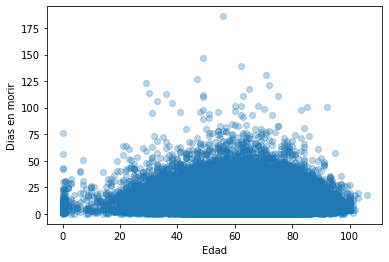

In [66]:
# Graficar correlación sólo de personas fallecidas
import matplotlib.pyplot as plt

x = df[df['RESULTADO']==0]['EDAD']
y = df[df['RESULTADO']==0]['DIAS_VIVO']
plt.scatter(x=x, y=y, alpha=0.3)
plt.xlabel('Edad')
plt.ylabel('Dias en morir')
plt.show()

Podemos observar que hay gente que tiene un tiempo de vida negativo. Quizá sea un error al capturar los datos.

### Otras cosas más que aprender de Pandas ###
Pandas puede hacer una multitud de tareas
* Unir dos o más DataFrames según diferentes reglas (usando join() y merge())
* Reordenar los registros según condiciones específicas
* Indexado Jerárquico: Columnas que tienen columnas
* Manejo más eficiente de memeoria y CPU, usando librerías como Spark, etc
* Tablas de Pivote
* Integración con otras librerías, como scikit-learn
* Análisis de series de tiempo